In [2]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\cartoes.csv'

df = pd.read_csv(DATA)
df

,tipo_de_defeito,frequencia
0,amassado,71
1,perfurado,28
2,impressao_ilegivel,12
3,caracteres_errados,20
4,numeros_errados,44
5,outros,6


In [4]:
df['frequencia'].sort_values(ascending=False)

0    71
4    44
1    28
3    20
2    12
5     6
Name: frequencia, dtype: int64

In [7]:
df = df.sort_values(by = 'frequencia',ascending=False)
df

,tipo_de_defeito,frequencia
0,amassado,71
4,numeros_errados,44
1,perfurado,28
3,caracteres_errados,20
2,impressao_ilegivel,12
5,outros,6


In [8]:
df['frequencia_relativa'] = df['frequencia'] / df['frequencia'].sum()
df['frequencia_acumulada'] = df['frequencia'].cumsum()
df['frequencia_relativa_acumulada'] = df['frequencia_relativa'].cumsum()

df

,tipo_de_defeito,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
0,amassado,71,0.392265,71,0.392265
4,numeros_errados,44,0.243094,115,0.635359
1,perfurado,28,0.154696,143,0.790055
3,caracteres_errados,20,0.110497,163,0.900552
2,impressao_ilegivel,12,0.066298,175,0.966851
5,outros,6,0.033149,181,1.000000


In [9]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\cartoes.csv'

df = pd.read_csv(DATA)
df = df.sort_values(by = 'frequencia',ascending=False)

df

,tipo_de_defeito,frequencia
0,amassado,71
4,numeros_errados,44
1,perfurado,28
3,caracteres_errados,20
2,impressao_ilegivel,12
5,outros,6


In [11]:
from meus_modulos.auxiliares import tabela_dist_freq

df_pareto = tabela_dist_freq(df, 'frequencia', coluna_frequencia=True)

df_pareto

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
0,71,0.392265,71,0.392265
4,44,0.243094,115,0.635359
1,28,0.154696,143,0.790055
3,20,0.110497,163,0.900552
2,12,0.066298,175,0.966851
5,6,0.033149,181,1.000000


In [12]:
df_pareto = df_pareto.set_index(df['tipo_de_defeito'])

df_pareto

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
tipo_de_defeito,,,,
amassado,71,0.392265,71,0.392265
numeros_errados,44,0.243094,115,0.635359
perfurado,28,0.154696,143,0.790055
caracteres_errados,20,0.110497,163,0.900552
impressao_ilegivel,12,0.066298,175,0.966851
outros,6,0.033149,181,1.000000


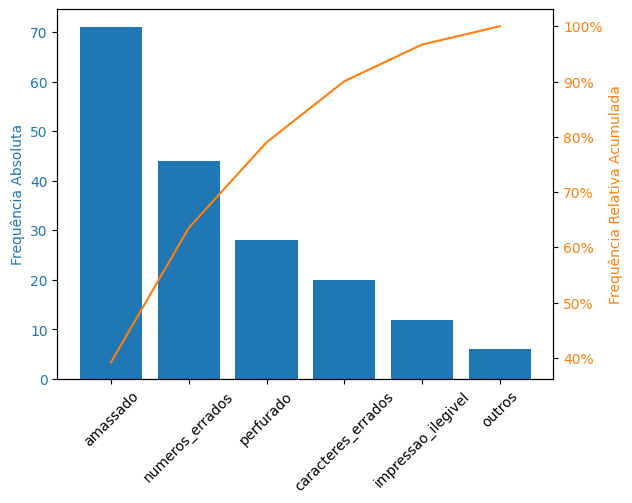

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_pareto.index, df_pareto['frequencia'], color = 'C0')
ax2.plot(df_pareto.index, df_pareto['frequencia_relativa_acumulada'], color = 'C1')

ax.set_ylabel('Frequência Absoluta', color = 'C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.tick_params(axis='x', rotation = 45)

ax2.set_ylabel('Frequência Relativa Acumulada', color = 'C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()